**Preprocessing**

In [65]:
import nbimporter
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo, list_available_datasets
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import random
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Get Data**

In [2]:
df = pd.read_csv("../mushroom/agaricus-lepiota.data")
mushroom = fetch_ucirepo(id=73)

**Map abbreviations to actual values**

In [3]:
mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

df.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',  'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',  'ring-type',  'spore-print-color', 'population',  'habitat']

#apply mappings to the dataframe
def map_features(df, mappings):
    for column in df.columns:
        if column in mappings:
            df[column] = df[column].map(mappings[column]).fillna(df[column])
    return df

# Apply the mappings to the dataframe
df_mapped = map_features(df, mappings)

# Now df_mapped should have the full names 
print(df_mapped.head())

  class cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0     e    convex      smooth    yellow  bruises   almond            free   
1     e      bell      smooth     white  bruises    anise            free   
2     p    convex       scaly     white  bruises  pungent            free   
3     e    convex      smooth      gray       no     none            free   
4     e    convex       scaly    yellow  bruises   almond            free   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0        close     broad      black  ...                   smooth   
1        close     broad      brown  ...                   smooth   
2        close    narrow      brown  ...                   smooth   
3      crowded     broad      black  ...                   smooth   
4        close     broad      brown  ...                   smooth   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                  white                  white   

In [21]:
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

**Check for and remove missing values**

In [4]:
for column in df_mapped.columns:
    if df_mapped[column].isnull().any():
        print(f"Column {column} has missing values")
        df_mapped = df_mapped[df_mapped[column].notnull()]

In [5]:
df_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8123 non-null   object
 1   cap-shape                 8123 non-null   object
 2   cap-surface               8123 non-null   object
 3   cap-color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill-attachment           8123 non-null   object
 7   gill-spacing              8123 non-null   object
 8   gill-size                 8123 non-null   object
 9   gill-color                8123 non-null   object
 10  stalk-shape               8123 non-null   object
 11  stalk-root                8123 non-null   object
 12  stalk-surface-above-ring  8123 non-null   object
 13  stalk-surface-below-ring  8123 non-null   object
 14  stalk-color-above-ring  

In [6]:
df = df_mapped
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,e,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses


In [80]:
df.describe()
df_mapped.isnull().sum()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


**Data Visualization**

Frequency Bar Chart

In [17]:
columns_to_plot = df.columns[:-1]

# Loop through columns and create bar charts
for col in columns_to_plot:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Scatterplots

In [18]:
features = df.columns.tolist()
features.remove('class')  # Remove 'class' from the list of features 

for feature in features:
    sns.countplot(x=feature, hue='class', data=df)
    plt.title(f"Distribution of {feature} by Edibility")
    plt.show()

**Check distribution of `edible` and `poisonous`**

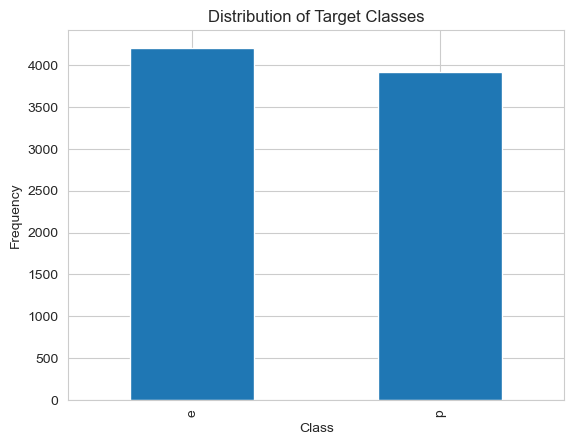

In [9]:
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Linearity Determination

In [10]:
def plot_random_feature_pairs_grid(df):
    """
    Generates scatter plots of random feature pairs arranged in a 2x2 grid.

    Args:
        df (DataFrame): The DataFrame containing your data.
    """
    features = df.columns.tolist()  

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) # Create 2x2 grid

    for ax in axes.flat:  # Iterate over the axes in the grid
        feature_1, feature_2 = random.sample(features, 2) 
        ax.scatter(df[feature_1], df[feature_2])
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)
        ax.set_title(f"Scatter Plot: {feature_1} vs. {feature_2}")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [19]:
# Example usage (call the function repeatedly)
plot_random_feature_pairs_grid(df)

**One-Hot Encoding**

In [12]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 
categorical_features = df.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(df[categorical_features])

new_column_names = encoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(encoded_data, columns=new_column_names)

#df - original mapped dataframe
#df_encoded - dataframe after one-hot encoding
df_encoded.head()

,class_e,class_p,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Columns: 119 entries, class_e to habitat_woods
dtypes: float64(119)
memory usage: 7.4 MB


**one-hot-encoding except the target (`class`) column**

In [76]:
# 1. Split into training and testing sets FIRST
X_train, X_test, y_train, y_test = train_test_split(df_mapped, df_mapped['class'],  test_size=0.2, random_state=42)

# 2. One-hot encode features separately
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform training features
X_train_encoded = encoder.fit_transform(X_train.drop('class', axis=1)) 
feature_names = encoder.get_feature_names_out(X_train.drop('class', axis=1).columns)  # Adjust if needed
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)

# Transform testing features (using encoder fit on training data)
X_test_encoded = encoder.transform(X_test.drop('class', axis=1))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)

# 3. Map target variable separately
y_train = y_train.map({'e': 1.0, 'p': 0.0}) 
y_test = y_test.map({'e': 1.0, 'p': 0.0}) 


**Test Logistic Regression**

In [77]:
log_reg = LogisticRegression(max_iter=10000)  

# Train the model on the training set
log_reg.fit(X_train_encoded_df, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test_encoded_df)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       772
         1.0       1.00      1.00      1.00       853

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[772   0]
 [  0 853]]


**Standardization**

In [56]:
features_to_scale = [col for col in df_encoded.columns if col not in ['class_e', 'class_p']]

scaler = StandardScaler()
df_encoded[features_to_scale]  = scaler.fit_transform(df_encoded[features_to_scale])

df_scaled = pd.DataFrame(df_encoded, columns=df_encoded.columns) 
df_scaled.head()

,class_e,class_p,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1.0,0.0,-0.242741,-0.022196,1.105638,-0.79629,-0.336901,-0.062889,-0.632292,-0.022196,...,-0.425858,-0.99472,-0.51676,1.667830,-0.337807,-0.193100,-0.404871,-0.217527,-0.155592,-0.795465
1,1.0,0.0,4.119616,-0.022196,-0.904455,-0.79629,-0.336901,-0.062889,-0.632292,-0.022196,...,-0.425858,-0.99472,-0.51676,-0.599581,-0.337807,5.178657,-0.404871,-0.217527,-0.155592,-0.795465
2,0.0,1.0,-0.242741,-0.022196,1.105638,-0.79629,-0.336901,-0.062889,-0.632292,-0.022196,...,2.348198,-0.99472,-0.51676,-0.599581,-0.337807,-0.193100,-0.404871,4.597120,-0.155592,-0.795465
3,1.0,0.0,-0.242741,-0.022196,1.105638,-0.79629,-0.336901,-0.062889,-0.632292,-0.022196,...,-0.425858,-0.99472,-0.51676,1.667830,-0.337807,-0.193100,-0.404871,-0.217527,-0.155592,-0.795465
4,1.0,0.0,-0.242741,-0.022196,1.105638,-0.79629,-0.336901,-0.062889,-0.632292,-0.022196,...,-0.425858,-0.99472,-0.51676,1.667830,-0.337807,-0.193100,-0.404871,-0.217527,-0.155592,-0.795465


**Robust Scaling**

**PCA Analysis to Attempt dimensionality reduction**

In [81]:
pca = PCA(n_components=0.95)  

# Fit and transform the data (since it's already standardized)
df_pca = pca.fit_transform(df_scaled) 

# View the explained variance ratio for each component
print(pca.explained_variance_ratio_)

[0.09130701 0.08091657 0.07174273 0.05835593 0.0516774  0.04376066
 0.04053714 0.02822153 0.0235837  0.0227151  0.01945837 0.01856051
 0.01793698 0.01576436 0.01427298 0.01333056 0.01198396 0.01137539
 0.01125916 0.01089309 0.01043013 0.00982786 0.00973376 0.0094863
 0.0094548  0.00923886 0.00921737 0.00912895 0.00902832 0.00875468
 0.0086864  0.00863476 0.00863476 0.00860068 0.00853901 0.00847051
 0.00831536 0.00811303 0.00801388 0.00790986 0.00764345 0.00749965
 0.00716627 0.00707685 0.0069157  0.00676447 0.00666416 0.00635892
 0.0061775  0.00602129 0.00599228 0.00570153 0.00558121 0.00536472
 0.00517578 0.00504766 0.00473615 0.00444805 0.00427426]


PCA was not the best, so let's try an autoencoder

In [64]:
#Prep data - drop target columns
X = df_encoded
y = df_encoded[['class_e', 'class_p']]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#encoder creation
model = Sequential()
model.add(Dense(90, activation='relu', input_shape=(119,))) 
model.add(Dense(60, activation='relu')) 
model.add(Dense(30, activation='relu'))  # Bottleneck

# Step 4: Create the Decoder 
model.add(Dense(60, activation='relu'))  
model.add(Dense(90, activation='relu'))
model.add(Dense(119, activation='sigmoid')) 

optimizer = Adam(learning_rate=0.0001)

# Compile the model, specifying the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#train
model.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/20
204/204 [==============================] - 0s 975us/step - loss: 0.4959 - accuracy: 0.0031 - val_loss: 0.0643 - val_accuracy: 6.1538e-04
Epoch 2/20
204/204 [==============================] - 0s 652us/step - loss: -0.8181 - accuracy: 0.0000e+00 - val_loss: -4.1201 - val_accuracy: 0.0000e+00
Epoch 3/20
204/204 [==============================] - 0s 629us/step - loss: -76.8603 - accuracy: 0.0000e+00 - val_loss: -300.7134 - val_accuracy: 0.0000e+00
Epoch 4/20
204/204 [==============================] - 0s 633us/step - loss: -1775.7472 - accuracy: 0.0000e+00 - val_loss: -4670.0430 - val_accuracy: 0.0000e+00
Epoch 5/20
204/204 [==============================] - 0s 635us/step - loss: -14187.8574 - accuracy: 0.0000e+00 - val_loss: -28586.5508 - val_accuracy: 0.0000e+00
Epoch 6/20
204/204 [==============================] - 0s 636us/step - loss: -63305.0312 - accuracy: 0.0000e+00 - val_loss: -108317.6250 - val_accuracy: 0.0000e+00
Epoch 7/20
204/204 [==============================] - 0s

**Log. Reg. Model to test encoded DF**